## Handwritten digit recognizer using SVM

In [321]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [322]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Reading and understanding Data

In [323]:
numbers = pd.read_csv('train.csv')
numbers.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [398]:
numbers.shape

(42000, 785)

In [324]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [325]:
numbers.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,99%,max
label,42000.0,4.456643,2.887730,0.0,0.0,1.0,2.0,4.0,7.00,8.0,9.00,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel4,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel5,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel6,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel7,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
pixel8,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0


### Data Cleaning and Data exploration

In [326]:
#missing value check
numbers.isnull().sum(axis=0) 

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel7

#### No null values in the data. Therefore, we can proceed with the data exploration

In [327]:
numbers['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [328]:
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

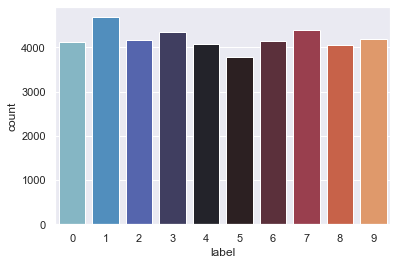

In [329]:
sns.countplot(numbers['label'],palette = 'icefire')

#### There is no data imbalance and the target values are equally distributed

#### Next, lets see how the pixel values are distributed

In [330]:
#Checking average value of all pixels
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

In [331]:
y = pd.value_counts(numbers.values.ravel()).sort_index()

In [332]:
y

0      26625444
1         20854
2         27778
3         29547
4         30805
5         31153
6         30325
7         31764
8         25731
9         30891
10        24799
11        25025
12        21308
13        27957
14        18903
15        20090
16        20193
17        19216
18        18992
19        23983
20        21095
21        24903
22        19141
23        15953
24        17927
25        20918
26        16860
27        16742
28        17844
29        25924
30        15890
31        18291
32        20182
33        11018
34        13932
35        15182
36        15479
37        17357
38        18369
39        12632
40        14442
41        18851
42        15600
43        14909
44        13305
45        14729
46        12111
47        16861
48        13812
49        12477
50        17009
51        17509
52        10245
53        13448
54        12670
55        12624
56        16196
57        22260
58        10089
59        12587
60        12557
61        12652
62      

We can clearly see that pixel value ranges from 0 to 255

Text(0, 0.5, 'Frequency')

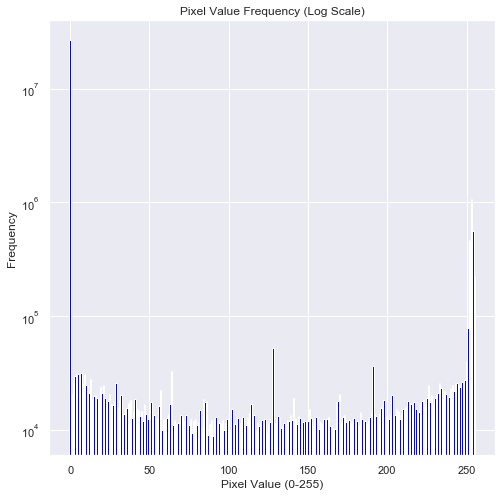

In [333]:
width = 0.9
plt.figure(figsize=[8,8])
plt.bar(range(len(y)),y,width,color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

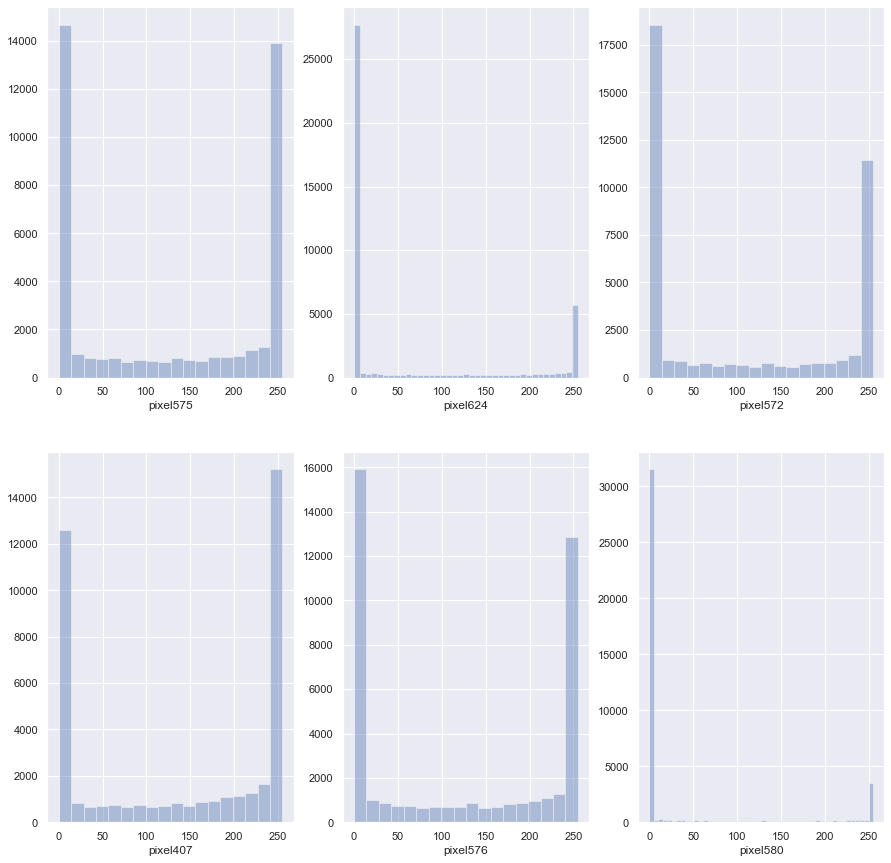

In [334]:
plt.figure(figsize=[15,15])
plt.subplot(2,3,1)
sns.distplot(numbers['pixel575'],kde=False)
plt.subplot(2,3,2)
sns.distplot(numbers['pixel624'],kde=False)
plt.subplot(2,3,3)
sns.distplot(numbers['pixel572'],kde=False)
plt.subplot(2,3,4)
sns.distplot(numbers['pixel407'],kde=False)
plt.subplot(2,3,5)
sns.distplot(numbers['pixel576'],kde=False)
plt.subplot(2,3,6)
sns.distplot(numbers['pixel580'],kde=False)
plt.show()

#### Checking distribution of pixel values with repect to labels

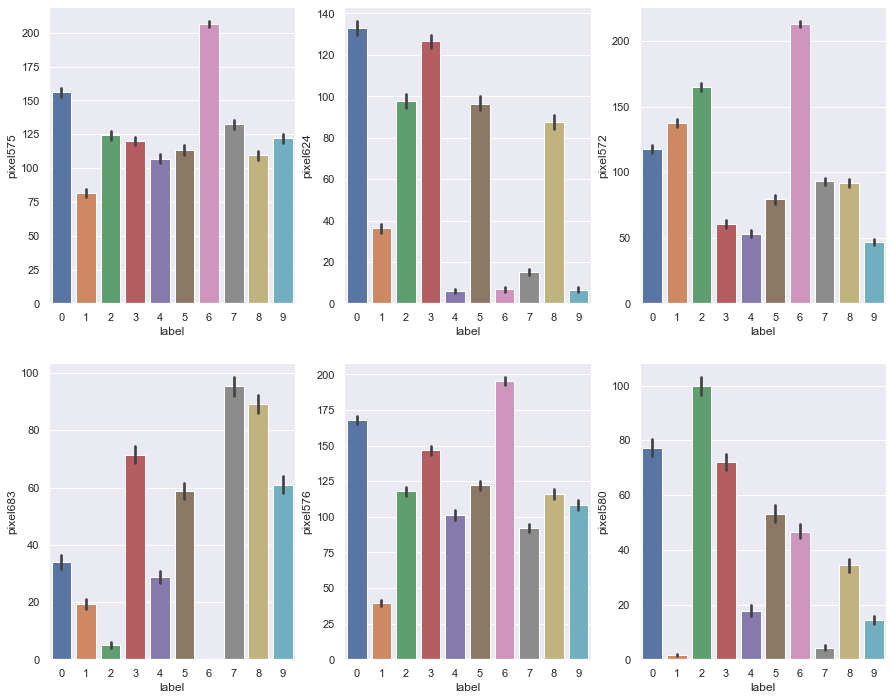

In [335]:
plt.figure(figsize=[15,12])
plt.subplot(2,3,1)
sns.barplot(x='label', y='pixel575', data=numbers)
plt.subplot(2,3,2)
sns.barplot(x='label', y='pixel624', data=numbers)
plt.subplot(2,3,3)
sns.barplot(x='label', y='pixel572', data=numbers)
plt.subplot(2,3,4)
sns.barplot(x='label', y='pixel683', data=numbers)
plt.subplot(2,3,5)
sns.barplot(x='label', y='pixel576', data=numbers)
plt.subplot(2,3,6)
sns.barplot(x='label', y='pixel580', data=numbers)
plt.show()

#### Inferences:
- Label 6 have an average value of 255 for pixel575 and pixel572
- Label 2 have an average value of 100 for pixel580


### Lets visualize how a digit is written in different styles

In [336]:
numbers.loc[numbers['label']==1].head(10).index.values

array([ 0,  2, 12, 15, 35, 37, 38, 41, 52, 59], dtype=int64)

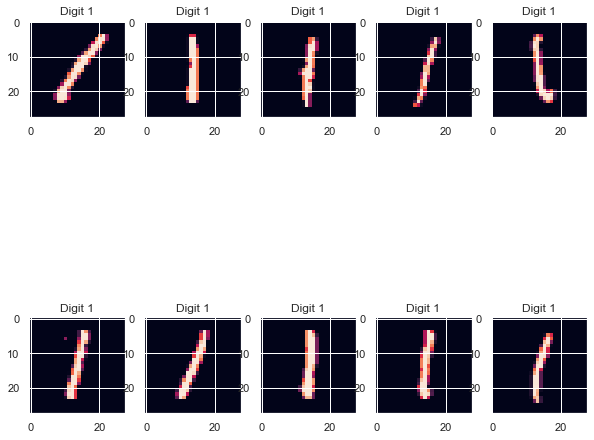

In [337]:
plt.figure(figsize=[10,10])
ones_index = numbers.loc[numbers['label']==1].head(10).index.values
for i in range(0,10):
    one = numbers.iloc[ones_index[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(one)
    plt.title("Digit 1")

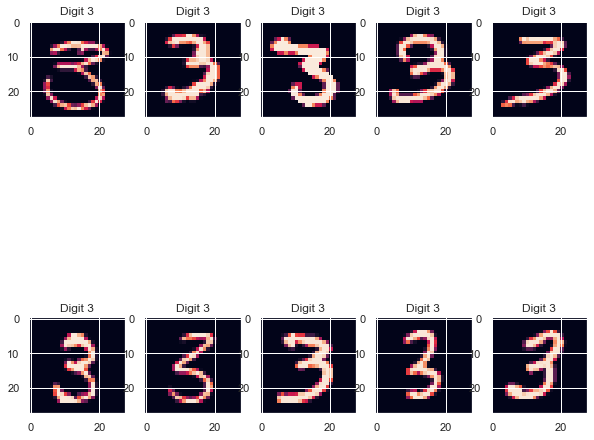

In [338]:
plt.figure(figsize=[10,10])
threes_index = numbers.loc[numbers['label']==3].head(10).index.values
for i in range(0,10):
    one = numbers.iloc[threes_index[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(one)
    plt.title("Digit 3")

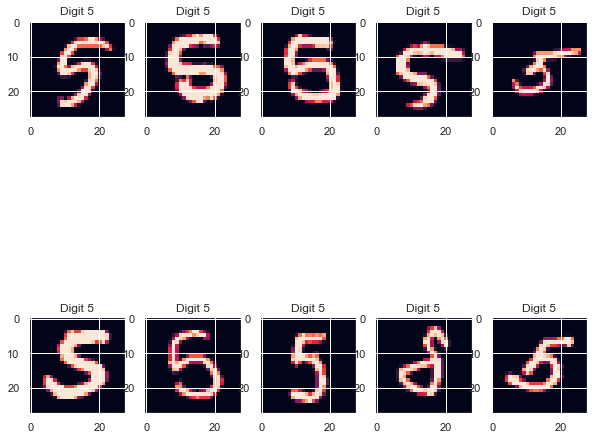

In [339]:
plt.figure(figsize=[10,10])
fives_index = numbers.loc[numbers['label']==5].head(10).index.values
for i in range(0,10):
    one = numbers.iloc[fives_index[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(one)
    plt.title("Digit 5")

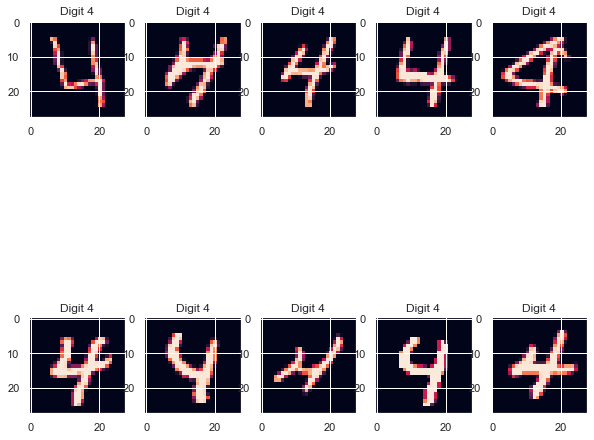

In [340]:
plt.figure(figsize=[10,10])
fours_index = numbers.loc[numbers['label']==4].head(10).index.values
for i in range(0,10):
    one = numbers.iloc[fours_index[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(one)
    plt.title("Digit 4")

In [341]:
### Heatmap

## Data Preparation
- Splitting data into train and test
- Scaling of the data

In [342]:
y = numbers['label']
X = numbers.drop('label',axis=1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [343]:
y[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [344]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2 ,test_size = 0.8, random_state=100)

In [345]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#round(X_train_scaled.describe(),2)

In [346]:
print('X_train shape:',X_train_scaled.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test_scaled.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


## Dimensionality Reduction: 
We see that number of pixels are a quite large. Let us first try to reduce the number of features with the help of PCA

#### Appying PCA to reduce the number of  features

In [347]:
pca = PCA(random_state=42)

In [348]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [349]:
pca.components_.shape

(784, 784)

In [350]:
pca.explained_variance_ratio_

array([6.18001501e-02, 4.40755242e-02, 4.03352136e-02, 3.11713340e-02,
       2.79828943e-02, 2.40499931e-02, 2.07994129e-02, 1.93202139e-02,
       1.65886773e-02, 1.57097803e-02, 1.46003985e-02, 1.31798232e-02,
       1.19724095e-02, 1.17185429e-02, 1.09962594e-02, 1.07673198e-02,
       1.03914787e-02, 1.00867508e-02, 1.00073256e-02, 9.64124849e-03,
       9.24221333e-03, 8.74986115e-03, 8.35424626e-03, 8.14009992e-03,
       7.95227763e-03, 7.76856028e-03, 7.36762463e-03, 7.20279125e-03,
       6.98911268e-03, 6.75923720e-03, 6.66819706e-03, 6.37220586e-03,
       6.25755709e-03, 6.16641452e-03, 6.13281407e-03, 5.85406270e-03,
       5.72786585e-03, 5.70075469e-03, 5.40587102e-03, 5.35167338e-03,
       5.25096013e-03, 5.17664953e-03, 5.09919708e-03, 5.00928707e-03,
       4.92189518e-03, 4.79200408e-03, 4.67107735e-03, 4.55832477e-03,
       4.49817189e-03, 4.43958861e-03, 4.41816517e-03, 4.33951994e-03,
       4.22881258e-03, 4.17337088e-03, 4.07655208e-03, 3.95368769e-03,
      

In [351]:
var_cummu = np.cumsum(pca.explained_variance_ratio_)

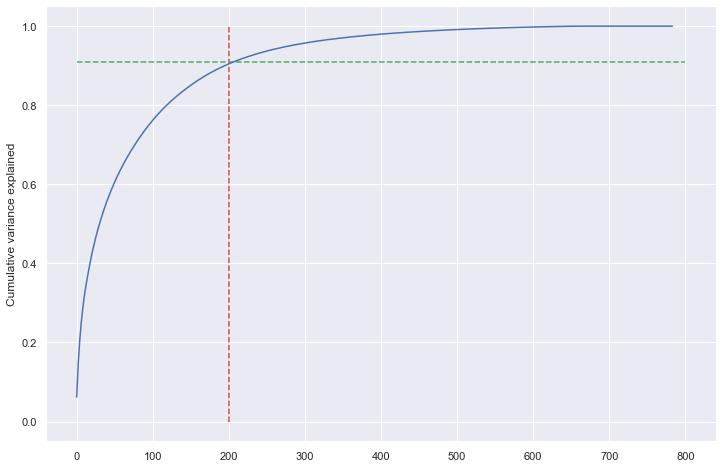

In [352]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12,8])
plt.vlines(x=200, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=800, xmin=0, colors="g", linestyles="--")
plt.plot(var_cummu)
plt.ylabel("Cumulative variance explained")
plt.show()

We see that 90% of variance is explained by 200 Principal Components.

### Performing PCA with 200 components

In [353]:
pca_final = IncrementalPCA(n_components = 200)

In [354]:
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [355]:
X_train_pca.shape

(8400, 200)

In [356]:
pca_final.components_.shape

(200, 784)

In [357]:
df_train_pca = pd.DataFrame(X_train_pca)
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-6.257859,3.553100,-1.321238,-1.273492,-0.086599,-4.547146,-2.122146,-3.465116,-1.303456,1.268098,3.029331,0.213746,0.079695,-1.880082,-1.835406,-1.543349,-0.382284,-2.264026,-0.501320,0.556537,-1.088932,-0.258631,1.126818,0.191611,1.555568,-0.545627,1.009830,0.568687,-0.696185,0.611502,-1.445776,1.226350,0.400235,1.920899,1.656898,0.062334,0.919568,-0.000104,-0.246932,1.224012,1.051735,-1.523564,-0.816066,1.206067,0.447988,0.262881,1.746305,0.716598,0.202069,0.320708,0.807521,-0.639241,-0.927050,0.023333,-0.625161,0.458867,-0.222318,-0.622332,-0.322957,-0.217173,-0.532966,0.159876,0.601239,-1.548224,0.229875,0.324251,-0.496841,0.569304,0.162527,-1.290660,-0.001498,-0.674750,-0.276896,0.822371,-0.441408,-0.341083,0.143725,0.783003,-0.023047,0.397801,0.420735,-0.512972,-1.061684,0.374031,-0.565031,1.072967,0.898830,-0.293950,0.578128,1.864155,0.579767,-0.803427,-0.202678,-1.885390,0.221509,-0.403844,0.433209,-0.807177,-0.061011,-0.345936,1.114958,-0.448128,-0.333515,-1.036359,-0.872164,-0.013548,0.661270,-0.683144,-0.238883,-0.265760,-0.872637,-0.304945,0.353653,0.423803,-0.370920,-0.269192,0.418683,0.198974,0.679203,0.398114,0.000166,1.047595,-1.070516,-0.172080,-0.286591,-0.094212,-0.180017,0.375051,0.356655,-0.122547,0.246549,-0.087083,-0.342338,0.837227,-0.095167,-0.700520,0.144960,0.486508,-0.531999,0.187813,0.416386,0.083536,0.680425,0.113670,-0.534633,0.664772,-0.384155,0.124796,-0.325709,-0.007037,-0.537114,-0.492942,0.452605,0.712394,-0.062468,0.343799,1.259967,-0.749947,0.498762,-0.259985,0.161014,-0.889084,-0.290340,-0.016494,-0.806638,0.132437,-0.274118,-0.344848,-0.040823,-0.250144,-0.391052,-1.022664,-1.147540,-0.049850,-0.218498,0.122889,0.890098,-0.255679,-0.288879,0.836766,-0.489543,0.472002,-0.470096,-0.799832,0.050755,0.876487,-0.625290,0.814592,0.335680,0.132815,0.320345,0.093967,-0.230368,0.198436,0.016706,-0.812259,1.104077,0.621185,0.847282,0.153083
1,1.727022,11.078140,-11.571684,1.719416,4.115189,-2.803779,-2.772457,1.179088,-1.901739,-0.143298,6.266917,-4.800662,-1.762357,2.309678,-2.400036,-5.281346,-0.811681,-1.119089,-2.419011,2.189373,-1.576756,1.331745,6.718841,-0.255958,-0.897127,2.711248,2.364038,4.316058,0.743661,2.467934,-2.670155,-3.309073,0.087262,1.821611,1.700505,1.160188,-0.077735,-0.431892,-1.304896,-0.786122,-0.776782,2.586968,-0.988456,-0.104581,-1.023984,2.693073,-2.743273,-0.726712,-2.510584,0.070992,1.696339,0.170329,-1.115598,0.838317,-0.905144,1.954815,0.654629,1.869068,1.740508,-0.101083,-0.759504,0.399868,1.693878,-2.555192,0.164075,-1.119723,-1.801661,-0.312638,0.523974,0.646285,-0.179443,-1.625399,-0.022588,-0.313178,-0.581072,0.661483,-1.630962,0.473681,0.766835,-0.916253,1.144162,-0.648092,-0.682344,-0.833109,-0.569879,0.126903,1.885540,-0.690569,-0.376278,1.480337,-0.298254,1.521009,0.394949,0.098143,0.250215,1.134254,0.580392,0.220905,-0.088107,-0.699753,2.044819,-0.463322,-0.066987,0.334443,-1.240971,-0.339425,-1.000168,-0.378537,-0.504676,0.621099,0.502482,-1.220609,0.390246,-0.974537,-0.287188,-1.513725,-0.646106,0.655526,0.291063,-0.512722,-1.222767,0.266608,-1.247804,0.329012,1.647046,-0.280061,0.195611,0.399402,-1.295558,0.885810,-2.407741,-0.953615,-0.686703,-1.149320,0.954372,-0.155219,0.356697,-1.447454,-0.210142,0.719394,0.025475,0.049038,1.298740,-1.086713,-0.041366,-0.718212,-0.027

In [358]:
y_train_df = pd.DataFrame(y_train)
y_train_df['label'].value_counts()

1    936
7    904
6    852
2    845
0    842
3    840
4    828
9    825
8    822
5    706
Name: label, dtype: int64

In [359]:
new_df = pd.concat([df_train_pca,y_train_df],axis=1)
new_df['label'].value_counts().sort_index()

0.0    842
1.0    936
2.0    845
3.0    840
4.0    828
5.0    706
6.0    852
7.0    904
8.0    822
9.0    825
Name: label, dtype: int64

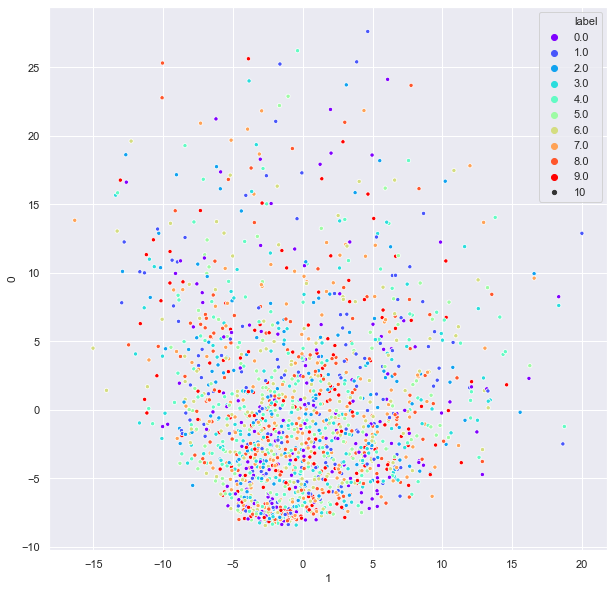

In [360]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=new_df[1],y=new_df[0],hue=new_df['label'],size=10,legend='full',palette='rainbow')

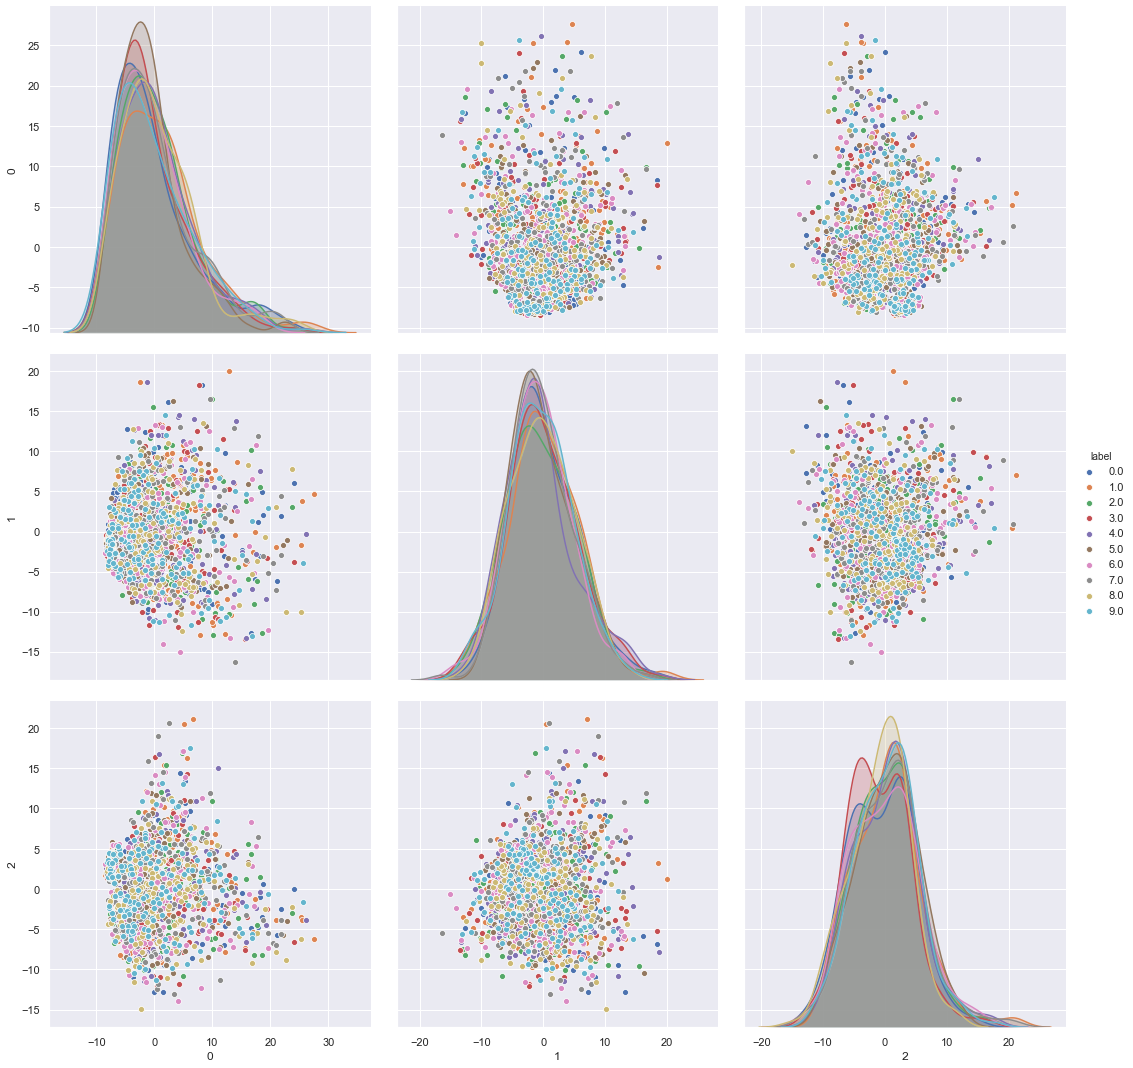

In [361]:
sns.pairplot(data=new_df, x_vars=[0,1,2], y_vars=[0,1,2], hue = "label", size=5)

In [362]:
pca_final.explained_variance_ratio_

array([0.06180011, 0.04407544, 0.04033515, 0.03117122, 0.02798282,
       0.02404989, 0.02079919, 0.01931997, 0.01658837, 0.01570954,
       0.01460013, 0.01317931, 0.01197201, 0.01171807, 0.01099576,
       0.01076674, 0.01039042, 0.01008602, 0.01000656, 0.00964057,
       0.00924141, 0.00874924, 0.00835281, 0.00813893, 0.00795101,
       0.00776645, 0.00736692, 0.0072017 , 0.00698796, 0.00675638,
       0.00666649, 0.00637094, 0.00625634, 0.00616406, 0.00613129,
       0.00585105, 0.00572497, 0.00569892, 0.00540261, 0.00535004,
       0.0052488 , 0.00517417, 0.00509692, 0.00500781, 0.00491907,
       0.0047899 , 0.0046685 , 0.00455514, 0.00449536, 0.00443416,
       0.00441491, 0.00433725, 0.00422624, 0.00416861, 0.00407478,
       0.00395178, 0.00390639, 0.00388329, 0.00383519, 0.00379425,
       0.00368749, 0.00361578, 0.00356782, 0.00349368, 0.00348044,
       0.00345742, 0.00343152, 0.00336954, 0.00332599, 0.00330496,
       0.0032405 , 0.00322205, 0.00314744, 0.00312298, 0.00304

### Redcucing the dimensions of the test data

In [363]:
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(33600, 200)

#### Till now we have converted our initial scaled data to pca transformed data

    - X_train --> X_train_scaled --> X_train_pca
    - X_test  --> X_test_scaled  --> X_test_pca

### Model building using SVM on PCA transformed data

SVM uses following three kernel to buld a model.

<b>The linear kernel:</b> This gives the linear support vector classifier, or the hyperplane.

<b>The polynomial kernel:</b> It is capable of creating nonlinear, polynomial decision boundaries 

<b>The radial basis function (RBF) kernel:</b> This is the most complex one, which is capable of transforming highly nonlinear feature spaces to linear ones. It is even capable of creating elliptical (i.e. enclosed) decision boundaries


#### Let us first try linear model

In [364]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_pca, y_train)

# predict
y_train_pred = model_linear.predict(X_train_pca)
y_test_pred = model_linear.predict(X_test_pca)

#### We just built our first SVM model using a `linear` kernel. Its time to evaluate our model using Accuracy as our evauation metric

In [365]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))

print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy on training data: 0.9957142857142857
Accuracy on testing data: 0.90625

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3290
           1       0.95      0.98      0.96      3748
           2       0.87      0.89      0.88      3332
           3       0.86      0.88      0.87      3511
           4       0.90      0.91      0.90      3244
           5       0.87      0.87      0.87      3089
           6       0.95      0.93      0.94      3285
           7       0.93      0.92      0.92      3497
           8       0.90      0.83      0.87      3241
           9       0.89      0.87      0.88      3363

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600


Confusion metrics on testing set 

[[3178    0   24   10    8   24   36    0   10    0]
 [   0 3660   27   15    3    3 

#### The linear model gives approx. 90.6% testing accuracy. Whereas our training data shows an accuracy of 95%. 

#### Let's look at a non-linear model with randomly chosen hyperparameters.


Trying `poly` kernel

In [366]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')
non_linear_model_poly.fit(X_train_pca, y_train)

# predict
y_train_pred = non_linear_model_poly.predict(X_train_pca)
y_test_pred = non_linear_model_poly.predict(X_test_pca)

#### Lets evaluate our model using Accuracy as our evauation metric

In [367]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy on training data: 0.9992857142857143
Accuracy on testing data: 0.9566964285714286

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3290
           1       0.99      0.98      0.99      3748
           2       0.95      0.95      0.95      3332
           3       0.95      0.94      0.95      3511
           4       0.95      0.97      0.96      3244
           5       0.95      0.95      0.95      3089
           6       0.97      0.97      0.97      3285
           7       0.97      0.95      0.96      3497
           8       0.91      0.95      0.93      3241
           9       0.94      0.93      0.94      3363

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600


Confusion metrics on testing set 

[[3219    0    8    3    7   12   22    2   14    3]
 [   0 3691   19    4

#### The accuracy increased to 95.66, so obviously no point in going with linear. Let us try 'rbf'.

#### Trying `rbf` kernel

In [368]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='rbf')
non_linear_model_poly.fit(X_train_pca, y_train)

# predict
y_train_pred = non_linear_model_poly.predict(X_train_pca)
y_test_pred = non_linear_model_poly.predict(X_test_pca)

In [369]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy on training data: 0.9966666666666667
Accuracy on testing data: 0.9068154761904762

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3290
           1       0.98      0.97      0.98      3748
           2       0.62      0.98      0.76      3332
           3       0.95      0.86      0.90      3511
           4       0.97      0.89      0.93      3244
           5       0.95      0.89      0.92      3089
           6       0.97      0.90      0.93      3285
           7       0.94      0.87      0.90      3497
           8       0.95      0.88      0.92      3241
           9       0.94      0.88      0.91      3363

    accuracy                           0.91     33600
   macro avg       0.93      0.91      0.91     33600
weighted avg       0.93      0.91      0.91     33600


Confusion metrics on testing set 

[[3113    0  135    1    4    8   20    0    8    1]
 [   0 3647   52    8

#### Accuracy is descreased by using rbf model. Lets go forward with poly kernel model.

Till now, after PCA transformation with 200 components, we tried SVM using 3 different kernels and using default hyperparamters (C and gamma)
We finialized that `PCA transformed` data along with `poly` SVM kernel gives us an accuracy of 96%.

Therefore, to further fine tune our model we can consider following changes:
- Trying different number of PCA components. We can connsider using 195 and 200 components.
- Trying different values of hyperparameter C. The value of C tells us how much you want to avoid misclassifying on training data. We can consider C as 1, 10.
- Trying different values of hyperparameter gamma. The hyperparameter gamma controls  the amount of non-linearity in the model - as gamma increases, the model becomes more non-linear, and thus model complexity increases. We can consider gamma as 0.1,0.01.
    
Now we want to know what should be the best combination of values of number PCA compnents, C and gamma for our model built using `poly` kernel of SVM.

We will be using grid search cross validation to find the best comnination of the hyperparamters.

Along with this, we will introduce the pipelining functionality of sklearn.

Till now the steps we did include:

1. Scale the initial data
2. Perform PCA to reduce the dimensionality
3. Build a model using SVM.

A pipeline, will schedule all the above steps and create the final model in our gridSearch.

#### Using Pipeline for performing scaling, PCA and SVM on the Data

In [370]:
pipe_steps = [('scaler',StandardScaler()),('pca',PCA()),('SVM',SVC(kernel='poly'))]
check_params = {
    'pca__n_components' : [195,200],
    'SVM__C':[1,10],
    'SVM__gamma':[0.01,0.001]
}

pipeline = Pipeline(pipe_steps)

Now, gridSearch will be used to find the best combbiantion of parameters. In the above pipeline, for every value of PCA number of components, the grid search will build model 4 models.

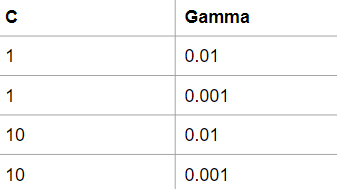

As we are considering, 2 values for PCA components, therefore, GridSearch will build 8 different models. 

For the 8 different models, we will be using KFold cross validation with 3 splits. Therefore, the training will be done on 8X3 = 24 different models fits.

Now lets get our final parameters for the model.

In [399]:
folds = KFold(n_splits=3,shuffle=True,random_state=101)


#setting up GridSearchCV()
model_cv = GridSearchCV(estimator = pipeline,
                       param_grid = check_params,
                       scoring = 'accuracy',
                       cv = folds,
                       verbose = 3,
                       return_train_score=True,
                       n_jobs=-1)

#fit the model
model_cv.fit(X_train,y_train) # Considering our initial data as scaling will be handled by the pipeline.
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  3.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.0min finished


The best test score is 0.9522619047619048 corresponding to hyperparameters {'SVM__C': 1, 'SVM__gamma': 0.01, 'pca__n_components': 195}


In [372]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__C,param_SVM__gamma,param_pca__n_components,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,26.277002,0.051003,12.600502,0.295494,1,0.01,195,"{'SVM__C': 1, 'SVM__gamma': 0.01, 'pca__n_comp...",0.951429,0.935952,0.943690,0.007738,4,1.000000,1.000000,1.000000,0.000000
1,27.162503,0.057499,11.536504,0.481497,1,0.01,200,"{'SVM__C': 1, 'SVM__gamma': 0.01, 'pca__n_comp...",0.951667,0.937619,0.944643,0.007024,2,1.000000,1.000000,1.000000,0.000000
2,42.297508,0.162502,16.536497,0.922500,1,0.001,195,"{'SVM__C': 1, 'SVM__gamma': 0.001, 'pca__n_com...",0.624048,0.620714,0.622381,0.001667,8,0.674048,0.697143,0.685595,0.011548
3,46.983505,0.329499,16.808999,0.488004,1,0.001,200,"{'SVM__C': 1, 'SVM__gamma': 0.001, 'pca__n_com...",0.625000,0.621905,0.623452,0.001548,7,0.674762,0.697381,0.686071,0.011310
4,26.201500,1.236499,10.325501,0.395496,10,0.01,195,"{'SVM__C': 10, 'SVM__gamma': 0.01, 'pca__n_com...",0.952619,0.935952,0.944286,0.008333,3,1.000000,1.000000,1.000000,0.000000
5,27.402501,0.051499,9.562997,0.300000,10,0.01,200,"{'SVM__C': 10, 'SVM__gamma': 0.01, 'pca__n_com...",0.953095,0.936667,0.944881,0.008214,1,1.000000,1.000000,1.000000,0.000000
6,26.470504,0.539500,7.389001,0.022000,10,0.001,195,"{'SVM__C': 10, 'SVM__gamma': 0.001, 'pca__n_co...",0.913333,0.896190,0.904762,0.008571,6,0.956905,0.968333,0.962619,0.005714
7,24.370501,0.797506,7.838497,0.112497,10,0.001,200,"{'SVM__C': 10, 'SVM__gamma': 0.001, 'pca__n_co...",0.914286,0.896905,0.905595,0.008690,5,0.957143,0.968333,0.962738,0.005595


<b>The above table gives the results for 24 different model fits that were done by the grid Search. The best parameteres are selected based on the `mean_train_score` and `mean_test_score` as shown in the above table.


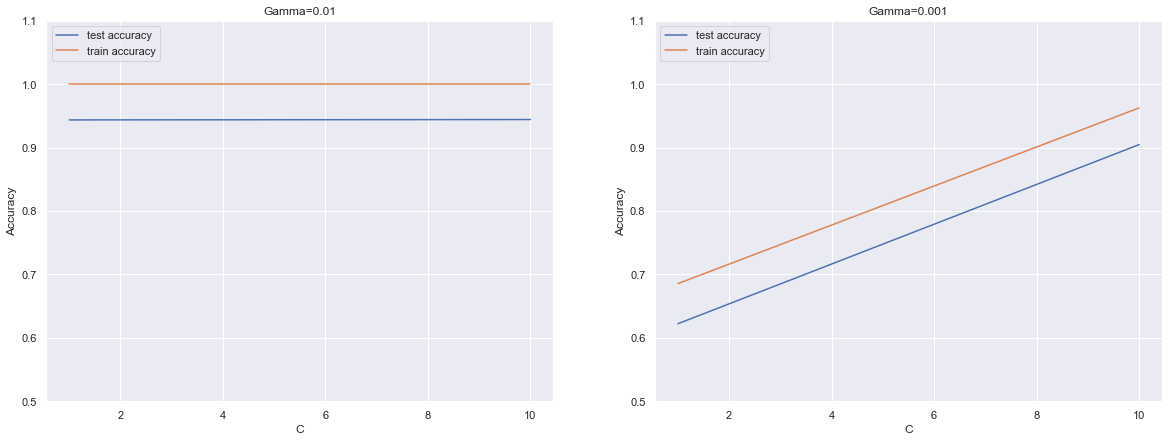

In [401]:
# converting C to numeric type for plotting on x-axis
cv_results['param_SVM__C'] = cv_results['param_SVM__C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(121)
gamma_01 = cv_results[(cv_results['param_SVM__gamma']==0.01) & (cv_results['param_pca__n_components'] == 195)]

plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 2/3
plt.subplot(122)
gamma_001 = cv_results[(cv_results['param_SVM__gamma']==0.001) & (cv_results['param_pca__n_components'] == 195)]

plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')



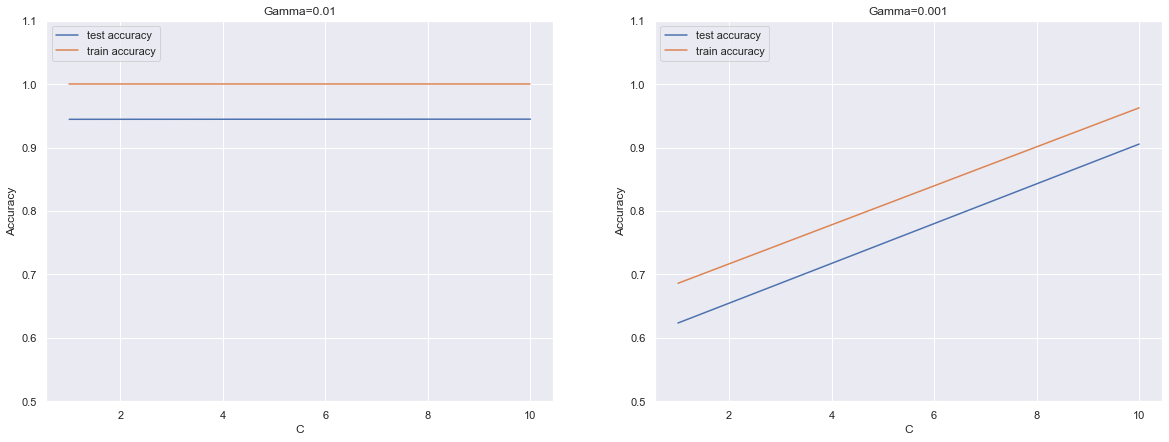

In [374]:
# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(121)
gamma_01 = cv_results[(cv_results['param_SVM__gamma']==0.01) & (cv_results['param_pca__n_components'] == 200)]

plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 2/3
plt.subplot(122)
gamma_001 = cv_results[(cv_results['param_SVM__gamma']==0.001) & (cv_results['param_pca__n_components'] == 200)]

plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

#### Now we have the best values of hyper parameters. 
### Let us build the final model using these values and evaluate the results.

In [402]:
pca_final = IncrementalPCA(n_components = 195)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)
print(X_test_pca.shape)
print(X_train_pca.shape)

(33600, 195)
(8400, 195)


In [403]:
# model with optimal hyperparameters

# model
final_model = SVC(C=1, gamma=0.01, kernel="poly")

final_model.fit(X_train_pca, y_train)
# predict
y_train_pred = final_model.predict(X_train_pca)
y_test_pred = final_model.predict(X_test_pca)

In [404]:
# metrics
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))

print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.956875

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3290
           1       0.98      0.98      0.98      3748
           2       0.95      0.95      0.95      3332
           3       0.95      0.94      0.95      3511
           4       0.95      0.96      0.96      3244
           5       0.95      0.94      0.95      3089
           6       0.97      0.97      0.97      3285
           7       0.97      0.95      0.96      3497
           8       0.92      0.95      0.94      3241
           9       0.94      0.93      0.94      3363

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600


Confusion metrics on testing set 

[[3223    0    8    3    6   10   25    2   11    2]
 [   0 3688   19    3    7    1    4    9   14

### Using final model on unseen data (test.csv)

In [405]:
#import file and reading few lines
test_df = pd.read_csv('test.csv')
test_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [406]:
test_df.shape

(28000, 784)

In [407]:
test_scaled = scaler.transform(test_df)

In [409]:
final_test_pca = pca_final.transform(test_scaled)
final_test_pca.shape

(28000, 195)

In [410]:
#model.predict
test_predict = final_model.predict(final_test_pca)

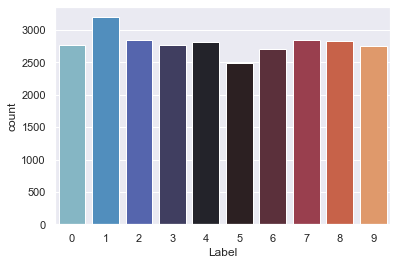

In [411]:
# Plotting the distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'icefire')

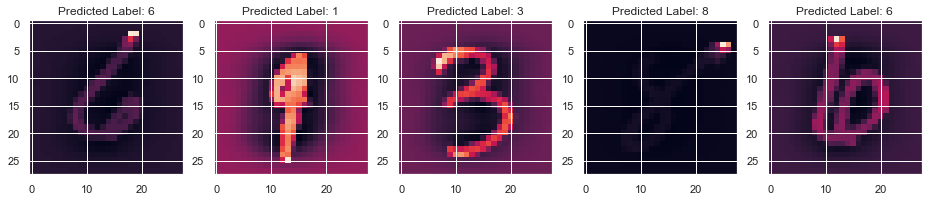

In [412]:
# Let us visualize few of predicted test numbers
df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [413]:
# Exporting the predicted values 
data_to_export.to_csv(path_or_buf='submission.csv', index=False)

In [414]:
submitted = pd.read_csv('submission.csv')

In [415]:
submitted.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
